In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_input = './Listings_2016/2016_Listings.csv'
#file_output = "./2016_Top30zipcodes.csv"

listings = pd.read_csv(file_input)
listings['zipcode'] = pd.to_numeric(listings['zipcode'])
by_zipcode = listings.groupby('zipcode').count()
by_zipcode = by_zipcode.sort_values('id', ascending=False)
by_zipcode.head(10)
#221 rows

Text(0.5,1,'Mean and Median Prices by Zipcode')

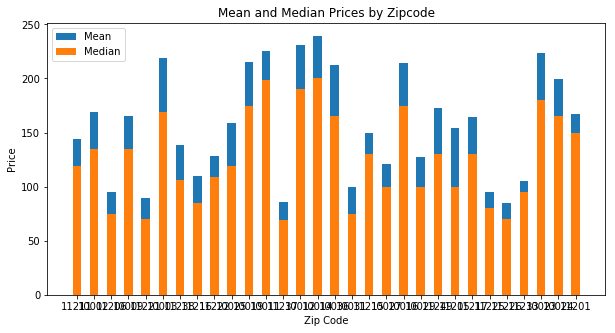

In [5]:
# Plot Mean and Median
plt.figure(figsize = (10,5))
x_axis = np.arange(len(zipcode_prices['Zip Code']))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, zipcode_prices['Zip Code'])
plt.bar(x_axis, zipcode_prices['Mean'], label ='Mean',width = 0.5)
plt.bar(x_axis, zipcode_prices['Median'], label = 'Median',width = 0.5)
plt.legend(loc='best')
plt.xlabel('Zip Code')
plt.ylabel('Price')
plt.title('Mean and Median Prices by Zipcode')

In [ ]:
#top 30 zipcode 2016

zip_list = list(by_zipcode.index.values)
zipcodes = zip_list[0:30]
means = []
medians = []
#maxs = []
#mins = []

for zipcode in zipcodes:
    median = listings.loc[listings['zipcode']==zipcode]['price'].median()
    mean = listings.loc[listings['zipcode']==zipcode]['price'].mean()
    #maxe = listings.loc[listings['zipcode']==zipcode]['price'].max()
    #mine = listings.loc[listings['zipcode']==zipcode]['price'].min()
    means.append(mean)
    medians.append(median)
    #maxs.append(maxe)
    #mins.append(mine)

zipcode_prices = pd.DataFrame({
    'Zip Code':zipcodes,
    'Mean': means,
    'Median': medians 
    })

#'Max': maxs, 'Min': mins

zipcode_prices       

In [6]:
# save df to cvs file
zipcode_prices.to_csv('./2016_Top30zipcodes.csv', index=True)

In [7]:
# top 10 zipcodes = [11211,11221,11206,10019,11216,10002,10009,10003,11222,11238]

# create Data Frame with specified zipcodes
# data from all months (except march-missing) per top 30 zipcodes(based on most concetration of listings)
frames = []

for zipcode in zipcodes:
    one_zip = listings.loc[listings['zipcode']==zipcode]
    frames.append(one_zip)

#print(frames)
by_zip = pd.concat(frames)
by_zip.reset_index()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,zipcode,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year_month
0,16,5258,Artist's Loft with indoor Hammock!,7611,NaN,Brooklyn,Williamsburg,11211,40.710302,-73.964961,Entire home/apt,175,2,51,8/28/2015,0.63,1,308,201601
1,24,5857,"Amazing Apt in WILLIAMSBURG, NY!!",10176,Juan,Brooklyn,Williamsburg,11211,40.717358,-73.942063,Entire home/apt,250,2,66,12/7/2015,0.81,1,351,201601
2,28,6111,"Dream Come True! Williamsburg, BK",12169,Miko & Lauren,Brooklyn,Greenpoint,11211,40.719211,-73.951231,Private room,109,2,96,10/26/2015,1.19,2,363,201601
3,34,7064,"Bright, peaceful loft, Williamsburg",17297,Joelle,Brooklyn,Williamsburg,11211,40.712643,-73.958624,Private room,125,2,9,8/31/2015,0.14,1,365,201601
4,84,13002,CBG Williamsburg loft room,22486,Lisel,Brooklyn,Williamsburg,11211,40.710961,-73.946840,Entire home/apt,145,2,10,12/12/2015,0.15,5,365,201601
5,87,13362,Landmark Williamsburg,52043,NaN,Brooklyn,Williamsburg,11211,40.715022,-73.958098,Entire home/apt,190,2,56,10/7/2015,0.76,1,359,201601
6,88,13380,"1 br Williamsburg Brooklyn Condo,",52233,NaN,Brooklyn,Williamsburg,11211,40.712523,-73.958105,Entire home/apt,100,7,4,6/7/2015,0.15,1,118,201601
7,101,14377,Williamsburg 1 bedroom Apartment,56512,Joanna,Brooklyn,Williamsburg,11211,40.708808,-73.959302,Entire home/apt,150,2,60,12/27/2015,0.82,1,36,201601
8,131,16008,Apt in Williamsburg,62132,Rachel,Brooklyn,Williamsburg,11211,40.714282,-73.945124,Entire home/apt,125,2,30,11/29/2015,0.41,1,341,201601
9,166,18764,Cozy 2 BR in Williamsburg,72014,NaN,Brooklyn,Williamsburg,11211,40.711540,-73.961120,Private room,129,3,54,12/16/2015,0.77,2,351,201601


In [8]:
#Avg price per month of 2016 for top 30 zipcodes (based on most concetration of listings)

by_month = by_zip.groupby('year_month')['price'].mean()
print(by_month)

by_m_max = by_zip.groupby('year_month')['price'].max()
print(by_m_max)

by_m_min = by_zip.groupby('year_month')['price'].min()
print(by_m_min)

year_month
201601    157.552759
201602    155.303234
201604    155.473077
201605    156.728703
201606    156.806046
201607    153.562608
201608    153.556165
201609    154.104945
201610    155.921774
201611    155.273621
201612    154.079583
Name: price, dtype: float64
year_month
201601    8000
201602    8000
201604    8000
201605    8000
201606    9999
201607    9999
201608    9999
201609    9999
201610    9999
201611    9999
201612    9999
Name: price, dtype: int64
year_month
201601    10
201602    10
201604    10
201605    10
201606    10
201607    10
201608    10
201609    10
201610    10
201611    10
201612    10
Name: price, dtype: int64


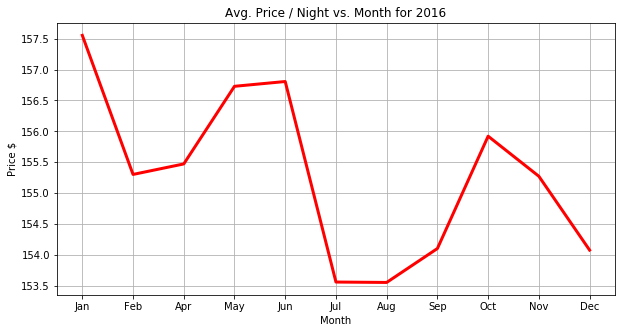

In [9]:
# Plot averages
plt.figure(figsize=(10,5))
x_axis = np.arange(len(by_month))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Jan','Feb','Apr','May','Jun',
                            'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.plot(x_axis, by_month, color='r', linewidth=3)
#plt.scatter(x_axis, by_m_min, color='b', linewidth=3)
#plt.scatter(x_axis, by_m_max, color='g', linewidth=3)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Price $')
plt.title('Avg. Price / Night vs. Month for 2016')
plt.show()

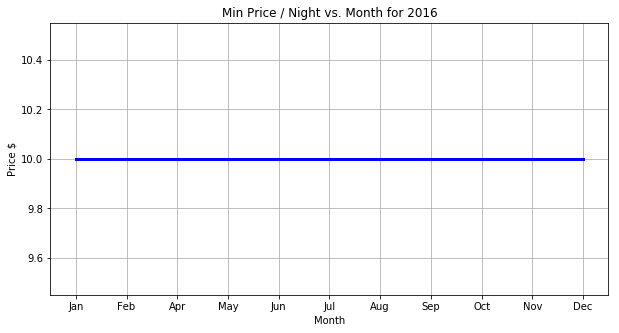

In [10]:
plt.figure(figsize=(10,5))
x_axis = np.arange(len(by_month))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Jan','Feb','Apr','May','Jun',
                            'Jul','Aug','Sep','Oct','Nov','Dec'])
#plt.scatter(x_axis, by_month, color='r', linewidth=3)
plt.plot(x_axis, by_m_min, color='b', linewidth=3)
#plt.scatter(x_axis, by_m_max, color='g', linewidth=3)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Price $')
plt.title('Min Price / Night vs. Month for 2016')
plt.show()

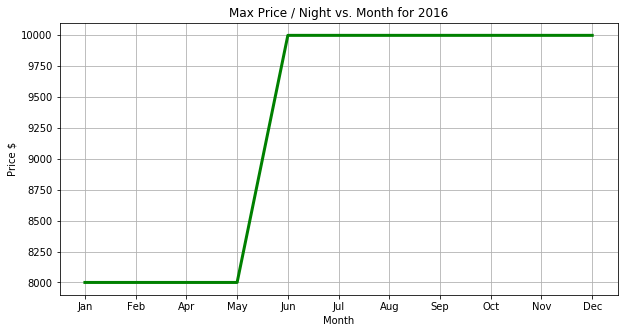

In [11]:
plt.figure(figsize=(10,5))
x_axis = np.arange(len(by_month))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Jan','Feb','Apr','May','Jun',
                            'Jul','Aug','Sep','Oct','Nov','Dec'])
#plt.scatter(x_axis, by_month, color='r', linewidth=3)
#plt.scatter(x_axis, by_m_min, color='b', linewidth=3)
plt.plot(x_axis, by_m_max, color='g', linewidth=3)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Price $')
plt.title('Max Price / Night vs. Month for 2016')
plt.show()

In [12]:
#find number of listings per month - top zipcodes only
listing_bymonth = by_zip.groupby('year_month')['id'].count()
#print(listing_bymonth)

grouped = pd.DataFrame({"Number of Listings":listing_bymonth, "Avg Price":by_month})
print(grouped)

#original data - all zipcodes
#listing_bymonth_original = listings.groupby('year_month')['id'].count()
#print(listing_bymonth_original)

            Number of Listings   Avg Price
year_month                                
201601                   24318  157.552759
201602                   24153  155.303234
201604                   21840  155.473077
201605                   21611  156.728703
201606                   24248  156.806046
201607                   25524  153.562608
201608                   23146  153.556165
201609                   25823  154.104945
201610                   25682  155.921774
201611                   25020  155.273621
201612                   26061  154.079583


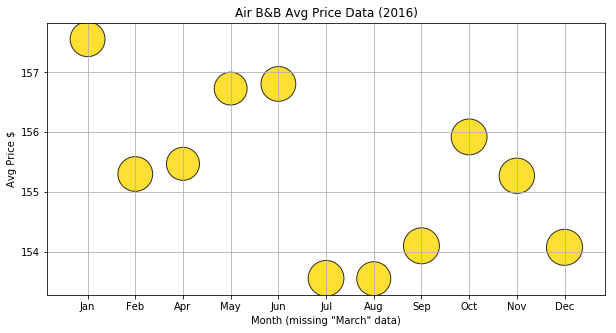

In [13]:
#BUBBLE PLOT - S==Correlating to number of listings/month 2016


plt.figure(figsize=(10,5))
x_axis = np.arange(len(by_month))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Jan','Feb','Apr','May','Jun',
                            'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.scatter(x_axis, grouped["Avg Price"], s=grouped["Number of Listings"]*.05, alpha=.8, linewidths=1.0, edgecolors='black',
            color='gold', label ="Listing Concentrations")
#plt.scatter(x_axis, by_m_min, color='b', linewidth=3)
#plt.plot(x_axis, by_m_max, color='g', linewidth=3)
plt.grid()
plt.xlabel('Month (missing "March" data)')
plt.ylabel('Avg Price $')
plt.title('Air B&B Avg Price Data (2016)')
plt.show()